# Quantum classification of Iris dataset with 2 labels

In [9]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from quantum_classification import *

## Traing with 2 features

In [10]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(80, 2) (80,)
(20, 2) (20,)


In [12]:
# settings
nqubits = X.shape[1]; nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'TPA'; cost_type = 'MSE'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

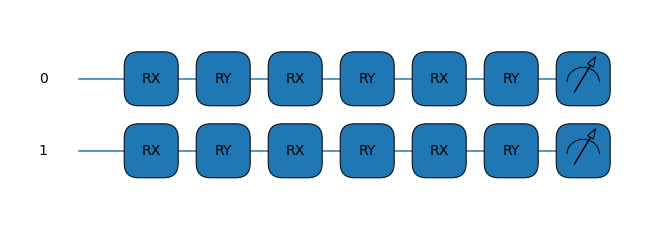

In [13]:
iris.draw_circuit()

In [14]:
iris.optimize()

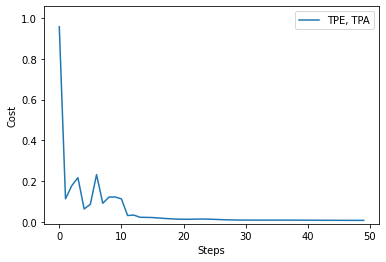

In [15]:
iris.plot_cost()

In [16]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.006864446999339249


## Train with 4 features

In [16]:
data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:4] # use first 4 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
for i in range(3):
    print(x_train[i], y_train[i])

[0.35 0.7  0.3  0.15] -1.0
[0.6  1.1  0.2  0.05] -1.0
[0.15 0.6  0.2  0.05] -1.0


In [18]:
# settings
nqubits = X.shape[1]; nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

# optimize
iris = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

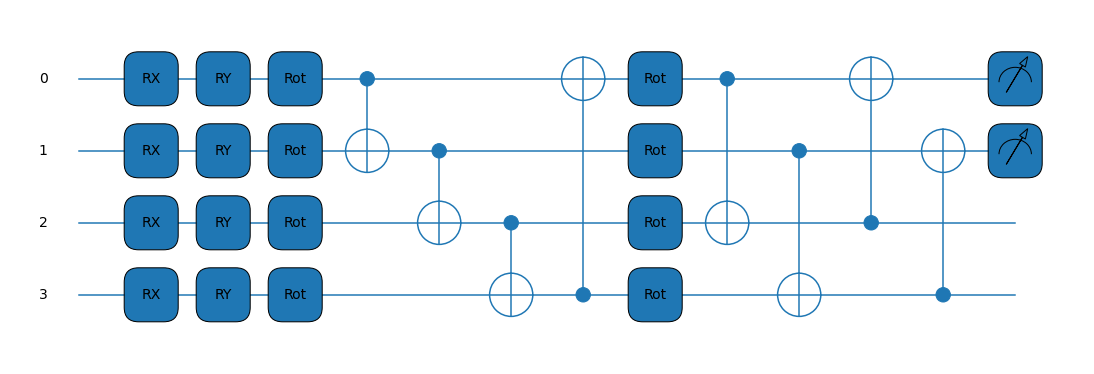

In [19]:
iris.draw_circuit()

In [20]:
iris.optimize()

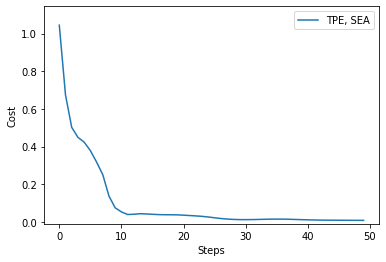

In [21]:
iris.plot_cost()

In [22]:
print('accuracy ', iris.accuracy(x_test, y_test))
print('optimized cost; ', iris.cost_list[-1])

accuracy  1.0
optimized cost;  0.008136722124082566


## Circuit structure and accuracy

In [23]:
from sklearn.model_selection import train_test_split
from structure_effect_on_trainability import *

data = np.loadtxt("data/iris_classes1and2_scaled.txt")
X = data[:,:2] # use first 2 features
Y = data[:,-1] # last column is the class
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
print(X.shape, Y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100,)
(80, 2) (80,)
(20, 2) (20,)


In [25]:
nqubits = X.shape[1]; nlayers_list = [2]; cost_type = 'LOG'
embedding_list = ['TPE', 'HEE', 'CHE', 'APE']
ansatz_list = ['TPA', 'HEA', 'SEA']
draw = False; shots = None; stepsize = 0.3; steps = 50

optimized_cost_acc_iris, cost_all_iris = train_each_circuit(x_train, y_train, x_test, y_test, nqubits, nlayers_list, embedding_list, ansatz_list, cost_type, draw, shots, stepsize, steps)

TPE, TPA
TPE, HEA
TPE, SEA
HEE, TPA
HEE, HEA
HEE, SEA
CHE, TPA
CHE, HEA
CHE, SEA
APE, TPA
APE, HEA
APE, SEA


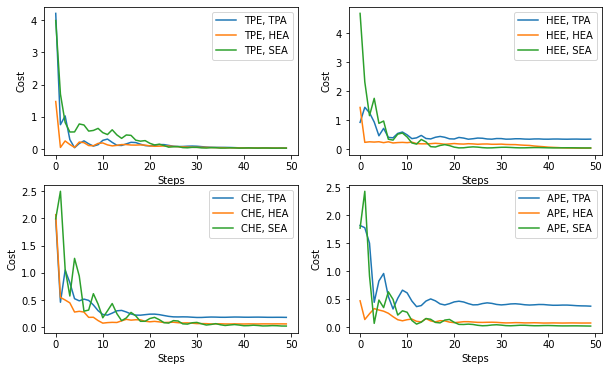

In [26]:
plot_cost(cost_all_iris)

In [27]:
sort_cost_acc(cost_type, optimized_cost_acc_iris)

LOG
embedding_type: APE, ansatz_type: SEA: cost 0.018000082335714183
embedding_type: CHE, ansatz_type: SEA: cost 0.02478795294123754
embedding_type: TPE, ansatz_type: TPA: cost 0.02971762613179635
embedding_type: TPE, ansatz_type: SEA: cost 0.029941862924879416
embedding_type: HEE, ansatz_type: HEA: cost 0.031250016854998196
embedding_type: TPE, ansatz_type: HEA: cost 0.031387610661113896
embedding_type: HEE, ansatz_type: SEA: cost 0.037000147828826394
embedding_type: CHE, ansatz_type: HEA: cost 0.064054245698728
embedding_type: APE, ansatz_type: HEA: cost 0.07256645373116644
embedding_type: CHE, ansatz_type: TPA: cost 0.18394865161058266
embedding_type: HEE, ansatz_type: TPA: cost 0.34159036466299664
embedding_type: APE, ansatz_type: TPA: cost 0.3738103030333496
---------------------------------------------------------------
embedding_type: TPE, ansatz_type: TPA: accuracy 1.0
embedding_type: TPE, ansatz_type: HEA: accuracy 1.0
embedding_type: TPE, ansatz_type: SEA: accuracy 1.0
embedd

## Another dataset (2 features and 4 labels)

In [1]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from quantum_classification import *

In [2]:
N = 50
X = np.random.uniform(-1, 1, (N,2))
Y = np.zeros(N).astype(int)

for i,x in enumerate(X):
    if x[0] > 0:
        if x[1] > 0:
            Y[i] = 0
        else:
            Y[i] = 3
    else:
        if x[1] > 0:
            Y[i] = 1
        else:
            Y[i] = 2

print(X[:5])
print(Y[:5])

[[ 0.87613551 -0.68682948]
 [-0.12011482 -0.67409903]
 [-0.42220474  0.51595564]
 [-0.74282025 -0.68558678]
 [-0.89114277 -0.71774035]]
[3 2 1 2 2]


In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# settings
nqubits = 4; nlayers = 3; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'
label = f'{embedding_type}, {ansatz_type}'

test = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

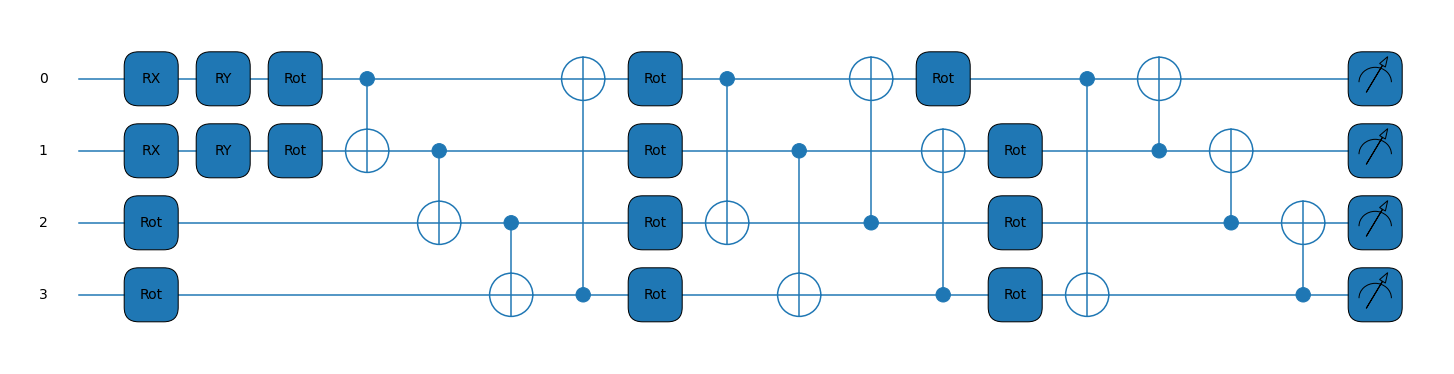

In [4]:
test.draw_circuit()

In [8]:
test.optimize()

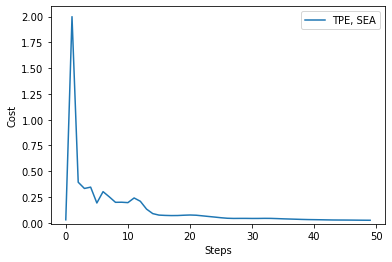

In [9]:
test.plot_cost()

In [10]:
print('accuracy ', test.accuracy(x_test, y_test))
print('optimized cost; ', test.cost_list[-1])

accuracy  1.0
optimized cost;  0.024303763470122104


## Random dataset

In [17]:
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from quantum_classification import *

In [30]:
N = 50
X = np.random.uniform(-1, 1, (N,2))
Y = np.random.randint(0, 2, N)

print(X[:5])
print(Y[:5])

[[-0.87758655  0.44734779]
 [-0.774886    0.00168001]
 [ 0.11204431 -0.68220031]
 [-0.55076294  0.74122596]
 [-0.54106301 -0.467747  ]]
[1 1 0 1 1]


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# settings
nqubits = 4; nlayers = 3; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'MSE'
label = f'{embedding_type}, {ansatz_type}'

test = quantum_classifier(x_train, y_train, nqubits, nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=50)

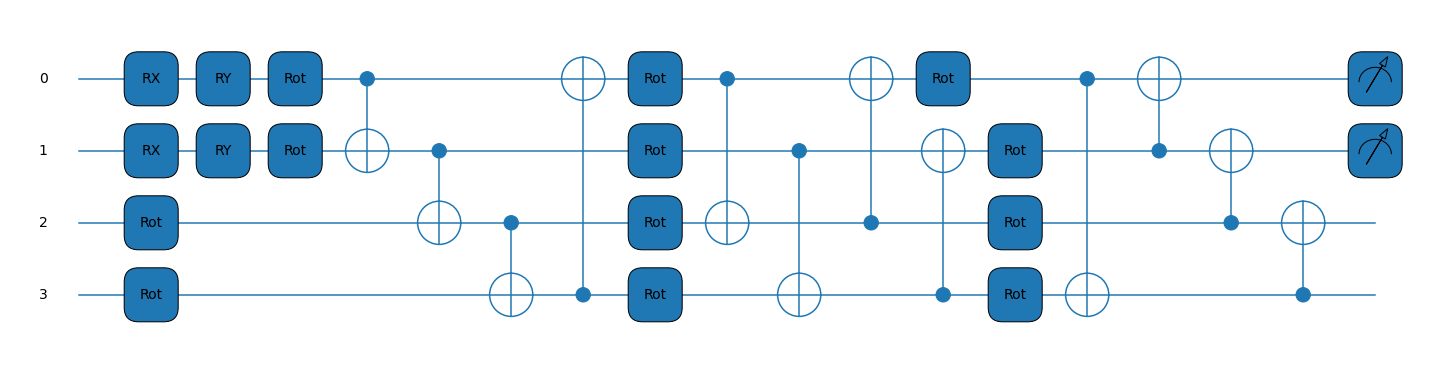

In [32]:
test.draw_circuit()

In [33]:
test.optimize()

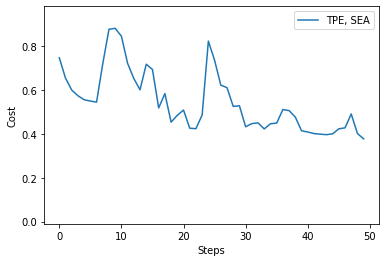

In [34]:
test.plot_cost()

In [35]:
print('accuracy ', test.accuracy(x_test, y_test))
print('optimized cost; ', test.cost_list[-1])

accuracy  0.5
optimized cost;  0.37701798637413875
